# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

## Identify fraudulent credit card transactions.

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Muhammad Ahsan\Desktop\PIAIC\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.fillna(df.mean())
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
x = df.drop('Class', axis = 1)
y = df['Class']
x_train = x[:142403]
y_train = y[:142403]
x_test = x[142404: 227845]
y_test = y[142404: 227845]
x_val = x[227846:]
y_val = y[227846:]
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
mean = x_train.mean(axis=0)
x_train -= mean

std = x_train.std(axis=0)

x_train /= std
x_test -= mean
x_test /= std
x_val -= mean
x_val /= std

In [15]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.483016,-0.612128,-0.058105,1.471218,0.938467,-0.042442,0.299518,0.307002,0.027342,0.415432,...,0.290743,0.029731,0.623652,-0.130907,0.093441,-0.005385,-0.427889,0.341821,-0.076144,0.239118
1,-2.483016,0.794475,0.152371,-0.400688,0.235176,0.262793,-0.125223,0.033820,0.016321,-0.152505,...,-0.154745,-0.257946,-0.820554,0.228106,-0.589381,0.082952,0.211886,-0.024913,0.040695,-0.357045
2,-2.482968,-0.611327,-0.845148,0.868432,0.183470,-0.168782,1.342845,0.780488,0.148109,-1.307460,...,0.671001,0.398991,1.401832,1.598166,-1.175950,-1.048523,-0.326303,-0.144214,-0.202525,1.168439
3,-2.482968,-0.395192,-0.127933,0.884059,-0.756573,0.208904,0.911439,0.305295,0.253298,-1.190398,...,-0.347891,-0.095054,0.194154,-0.266275,-1.992256,1.181026,-0.494533,0.159574,0.193314,0.133137
4,-2.482921,-0.501011,0.532165,0.691111,0.201055,-0.095217,0.013784,0.610162,-0.271970,0.831793,...,0.509153,0.042039,1.443746,-0.176654,0.218228,-0.770389,0.976339,0.562734,0.695244,-0.083977


In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/100
279/279 [==============================] - 1s 2ms/step - loss: 0.0930 - acc: 0.9899 - val_loss: 0.0060 - val_acc: 0.9990
Epoch 2/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0059 - acc: 0.9990 - val_loss: 0.0044 - val_acc: 0.9993
Epoch 3/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9992 - val_loss: 0.0039 - val_acc: 0.9994
Epoch 4/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 0.0038 - val_acc: 0.9995
Epoch 5/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0039 - val_acc: 0.9995
Epoch 6/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0033 - acc: 0.9993 - val_loss: 0.0039 - val_acc: 0.9996
Epoch 7/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.0038 - val_acc: 0.9995
Epoch 8/100
279/279 [==============================] - 0s 1ms/step - 

Epoch 62/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0073 - val_acc: 0.9995
Epoch 63/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0076 - val_acc: 0.9995
Epoch 64/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0074 - val_acc: 0.9995
Epoch 65/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0071 - val_acc: 0.9995
Epoch 66/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0075 - val_acc: 0.9995
Epoch 67/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0077 - val_acc: 0.9995
Epoch 68/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0075 - val_acc: 0.9995
Epoch 69/100
279/279 [==============================] - 0s 1ms

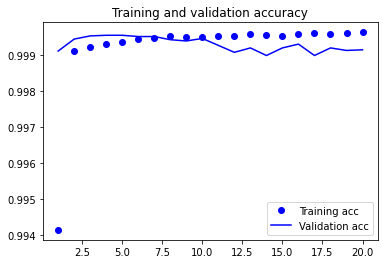

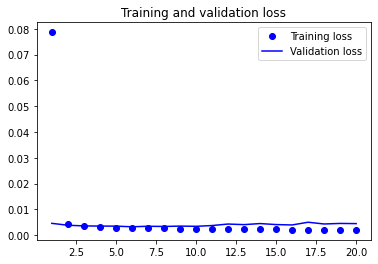

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

2671/2671 [==============================] - 2s 756us/step - loss: 0.0065 - acc: 0.9986
test_acc: 0.9985837936401367


In [10]:
model.predict(x_test)

array([[1.8555047e-05],
       [9.4657874e-01],
       [1.3926625e-04],
       ...,
       [7.8572398e-08],
       [7.8124656e-05],
       [1.4121953e-07]], dtype=float32)